In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from copy import copy

In [308]:
file_path = 'data//avito_new_data_for_dano.xlsx'

data = pd.read_excel(file_path)
data['CTR'] = data['page_views']

df = data

In [309]:
# Метод IQR для определения выбросов
Q1 = df[df['category'] == 'Кошки']['CTR'].quantile(0.25)
Q3 = df[df['category'] == 'Кошки']['CTR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[df['category'] == 'Кошки'] = df[df['category'] == 'Кошки'][(df['CTR'] >= lower_bound) & (df['CTR'] <= upper_bound)]

0    Дог
Name: breed, dtype: object
0    Шотландская
Name: breed, dtype: object


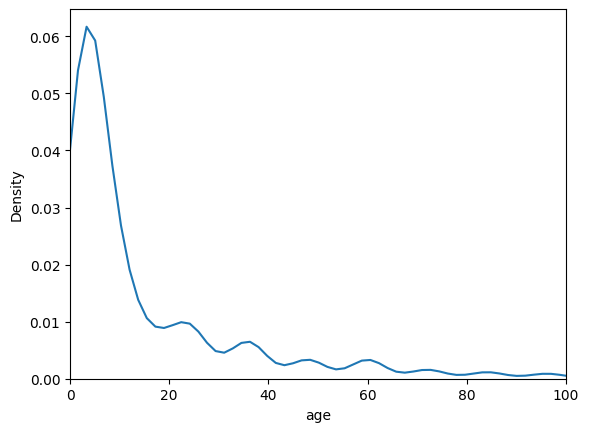

D:\Программы\Temp\Temp\ipykernel_18928\3124240030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].clip(upper=13)
D:\Программы\Temp\Temp\ipykernel_18928\3124240030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы


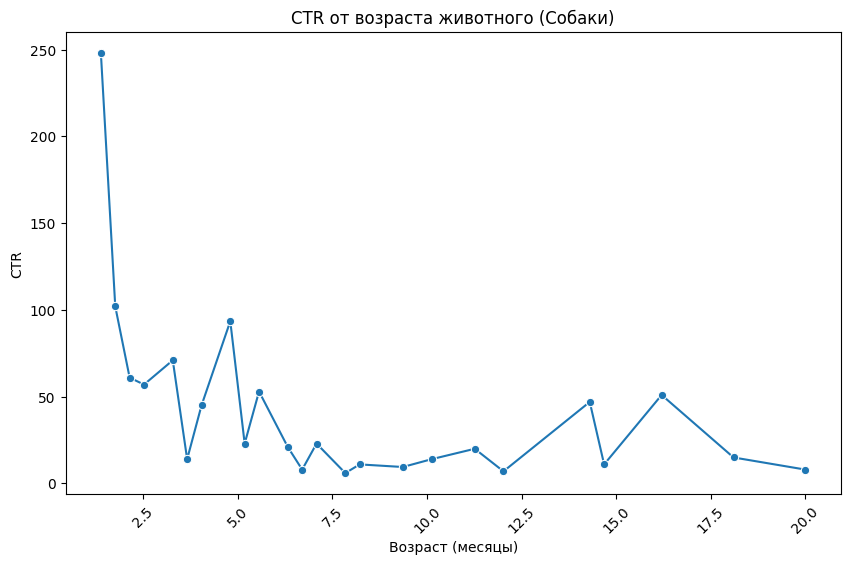

D:\Программы\Temp\Temp\ipykernel_18928\3124240030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы


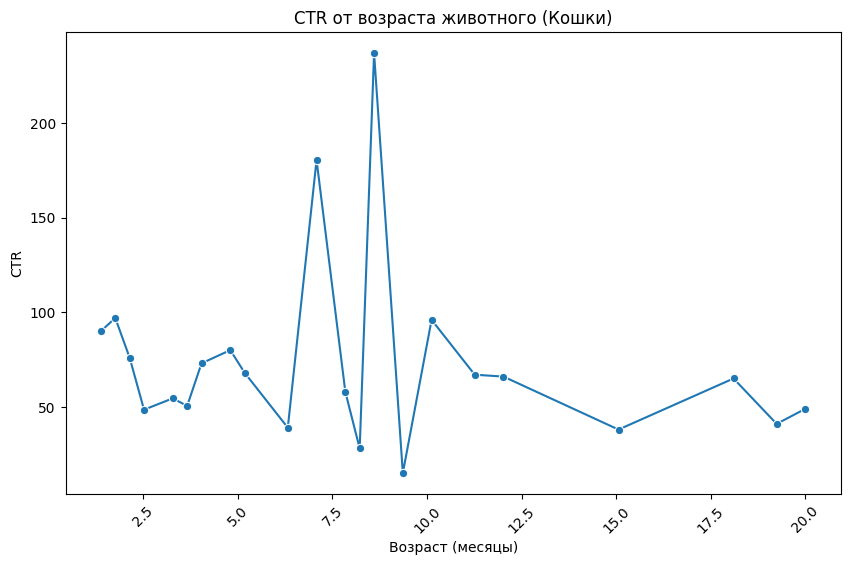

In [310]:
# Удаление NaN значений
df = df.dropna(subset=['category', 'age', 'description_length', 'CTR'])
sns.kdeplot(df['age'])
plt.xlim(0, 100)
plt.show()
df['age'] = df['age'].clip(upper=13)

print(df[df['category'] == 'Собаки']['breed'].mode())
print(df[df['category'] == 'Кошки']['breed'].mode())

def plot_line(x, y, title, xlabel, ylabel, df=df):

    # Создание интервалов для оси X
    df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=50)))  # Разбиваем на интервалы
    # Вычисление среднего значения Y для каждого интервала
    median_data = df.groupby('x_bins')[y].median().reset_index()  # Группировка и расчет среднего
    median_data = median_data.dropna()

    # Проверка на наличие данных в median_data
    if median_data.empty:
        print("Нет данных для построения графика.")
        return

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=median_data, x='x_bins', y=y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.show()


plot_line('age', 'CTR', 'CTR от возраста животного (Собаки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Собаки'][df['breed'] == 'Дог'])
plot_line('age', 'CTR', 'CTR от возраста животного (Кошки)', 'Возраст (месяцы)', 'CTR', df[df['category'] == 'Кошки'][df['breed'] == 'Шотландская'])

In [47]:
import statsmodels.api as sm

X = df[df['category'] == 'Собаки'][df['breed'] == 'Дог']['age'] # Независимые переменные
Y = df[df['category'] == 'Собаки'][df['breed'] == 'Дог']['CTR']          # Зависимая переменная

# Добавляем константу к независимым переменным
X = sm.add_constant(X)

# Создаем модель OLS
model = sm.OLS(Y, X)

# Подгоняем модель
results = model.fit()

# Выводим результаты
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.401
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0114
Time:                        20:54:30   Log-Likelihood:            -1.3007e+05
No. Observations:               17043   AIC:                         2.601e+05
Df Residuals:                   17041   BIC:                         2.602e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.0000      6.217     23.965      0.0